In [2]:
%load_ext autoreload
%autoreload 2

In [25]:
import xarray as xr
import esm2m.config_perturbations as cp
import matplotlib.pyplot as plt

In [26]:
rootdir = '/work/gam/projects/bio-pump-timescales/esm2m/data/global_integrals/'
override = False
rootdir = cp.add_override_suffix(rootdir,override)
localdir = 'bling'
variable = '*'

experiments = ['','_gat','_zero','_double']
dd = {}
for e in experiments:
    path = rootdir+localdir+e+'/esm2m_'+variable+e+'.nc'
    dd[e] = xr.open_mfdataset(path)

In [27]:
# Calculate anomaly
ddanom = cp.calc_anom(dd)

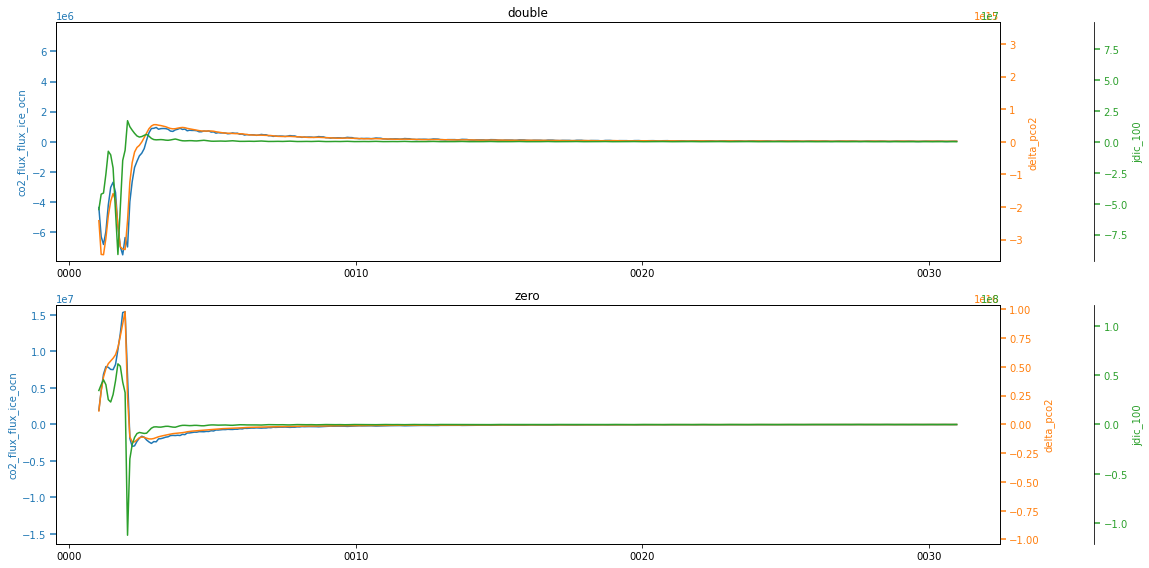

In [67]:
variables = ['co2_flux_flux_ice_ocn','delta_pco2','jdic_100']
tableau = ['blue','orange','green','red','purple',
           'brown','pink','gray','olive','cyan']
for j,variable in enumerate(variables):
    colors[variable] = 'tab:'+tableau[j]
    
fig,axarr = plt.subplots(figsize=(16,8),nrows=2)
tkw = dict(size=6, width=1.5)
experiments = ['double','zero']
for i,e in enumerate(experiments):
    ds = ddanom[e]
    ax = axarr.flat[i]
    for j,variable in enumerate(variables):
        if j==0:
            axnow = axarr.flat[i]
        else:
            axnow = axarr.flat[i].twinx()
            offsetax = 1+(j-1)/10
            axnow.spines.right.set_position(("axes",offsetax))
        p, = axnow.plot(ds['time'],ds[variable],color=colors[variable])
        # y-axis origin to same point for all variables
        yabs_max = abs(max(axnow.get_ylim(),key=abs))
        axnow.set_ylim(ymin=-yabs_max, ymax=yabs_max)
        axnow.set_ylabel(variable)
        axnow.yaxis.label.set_color(p.get_color())
        axnow.tick_params(axis='y', colors=p.get_color(), **tkw)
    ax.set_title(e)
fig.tight_layout()